In [1]:
import os
import pandas as pd

from graphs import load_dataset_to_graph
from recreate_graph import get_trained_model, recreate_by_priority_rank
from measurements import get_graph_measurements, compare_graph_measurements, print_comparison_results

Using TensorFlow backend.



Processing highschool_2011
Epoch 1/4
15876/15876 [==============================] - 0s 30us/step - loss: 0.0767 - acc: 0.7832
Epoch 2/4
15876/15876 [==============================] - 0s 27us/step - loss: 0.0103 - acc: 0.7846
Epoch 3/4
15876/15876 [==============================] - 0s 23us/step - loss: 0.0045 - acc: 0.7846
Epoch 4/4
15876/15876 [==============================] - 0s 24us/step
loss: 0.002475369415023268, accuracy: 0.7846434870244394


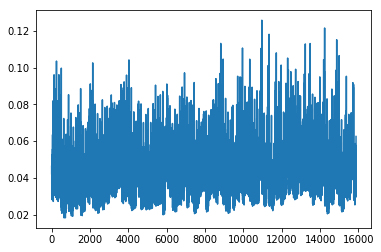

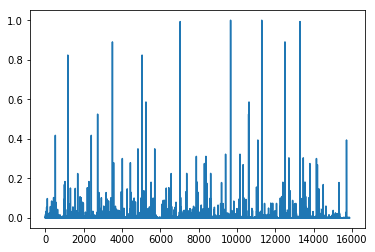

(KS test p-value)  degree_centrality: 0.0012399744450185212           [passed: False]
(KS test p-value)  closeness_centrality: 0.000751635986588346         [passed: False]
(KS test p-value)  betweenness_centrality: 7.5885154889784956e-06     [passed: False]
(KS test p-value)  pagerank: 7.5885154889784684e-06                   [passed: False]
(abs distance)     average_shortest_path_length: 0.06687960367642269  [passed: True]
(abs distance)     diameter: 0.25                                     [passed: False]
(abs distance)     degree_centralization: 0.5503878566522028          [passed: False]
(abs distance)     closeness_centralization: 0.5836574275074581       [passed: False]
(abs distance)     betweenness_centralization: 0.0239916324093989     [passed: True]
(abs distance)     pagerank_centralization: 0.5677570921772532        [passed: False]
(abs distance)     density: 0.004972214097689335                      [passed: True]
(abs distance)     degree_assortativity: 0.99999956416053

In [2]:
prepared_datasets_path = 'prepared_datasets'
prepared_dataframes_path = 'prepared_dataframes'
delimiter = '\t'

prepared_dataset_names = [
    #'primary_school', 'workplace', 
    'highschool_2011', #'highschool_2012', 'hospital', 
    #'moreno_blogs', 'moreno_sheep', 'moreno_seventh'
]
prepare_big_dataset_names = [
    'petster-hamster', 'email-Eu'
]

for dataset_name in prepared_dataset_names:
    print('\nProcessing {}'.format(dataset_name))
    dataset_path = os.path.join(prepared_datasets_path, dataset_name)
    dataframe_path = os.path.join(prepared_dataframes_path, dataset_name)
    
    graph = load_dataset_to_graph(dataset_path, node_limit=500)
    
    graph_real_attrs_dataframe_path = os.path.join(dataframe_path, 'graph_real_attrs.csv')
    df = pd.read_csv(graph_real_attrs_dataframe_path, delimiter=delimiter)
    
    model = get_trained_model(df, epochs=4)
    new_graph = recreate_by_priority_rank(graph, df, model, show_graphs=True)
    
    graph_measurements = get_graph_measurements(graph)
    new_graph_measurements = get_graph_measurements(new_graph)
    comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
    print_comparison_results(comparison)
    